# REFs and Imports

- https://towardsdatascience.com/speed-up-jupyter-notebooks-20716cbe2025

- https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html

In [75]:
# !pip install line_profiler

In [90]:
#!pip install py-heat-magic

In [116]:
#!pip install snakeviz

In [142]:
#!pip install -U memory_profiler

# %time & %timeit

This function estimates $\pi$ by considering the ratio $\frac{\text{area of a quarter of circle}}{\text{area of the square containing it}}$. The area is approximated by random points falling inside it.

In [100]:
from random import random

def estimate_pi(n=1e7) -> "area":
    """Estimate pi with monte carlo simulation.
    
    Arguments:
        n: number of simulations
    """
    in_circle = 0
    total = n
    
    while n != 0:
        prec_x = random() #random number between 0 and 1
        prec_y = random()
        if pow(prec_x, 2) + pow(prec_y, 2) <= 1:
            in_circle += 1 # inside the circle
        n -= 1
        
    return 4 * in_circle / total

Recursive version

In [49]:
# from random import random

def estimate_pi_rec(n=1e7) -> "area":
    def helper(in_circle, n):
        if n == 0: return in_circle 
        if random()**2 + random()**2 <= 1:
            return helper(in_circle+1, n-1)
        return helper(in_circle, n-1)
        
    in_circle = helper(0, n)
    return 4 * in_circle / n

In [7]:
estimate_pi(10000000)

3.1418656

In [69]:
# cannot go beyond 2960, else error: maximum recursion depth exceeded in comparison
estimate_pi_rec(2960)

3.0945945945945947

Estimate running time

In [79]:
#%timeit?

In [70]:
%time estimate_pi()

CPU times: user 3.92 s, sys: 9.17 ms, total: 3.93 s
Wall time: 3.94 s


3.1413852

In [ ]:
%time estimate_pi_rec()

In [71]:
%timeit -r 2 -n 5 estimate_pi()

4.02 s ± 93.1 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


# PROFILE %prun

In [125]:
%prun estimate_pi()

To save the profiler results in a file, use -D option

In [ ]:
# %prun -D pi.prof estimate_pi()

In [124]:
%prun -s cumulative estimate_pi()

In [94]:
%load_ext line_profiler
%load_ext heat

The heat extension is already loaded. To reload it, use:
  %reload_ext heat


In [ ]:
%lprun -f estimate_pi estimate_pi()

Heat extension: https://github.com/csurfer/pyheatmagic

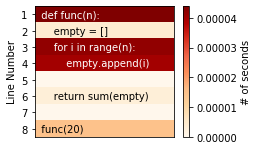

In [119]:
%%heat 
def func(n):
    empty = []
    for i in range(n):
        empty.append(i)
    
    return sum(empty)
    
func(20)

# SNAKEVIZ

In [117]:
%load_ext snakeviz

In [ ]:
%%snakeviz
def func(n):
    empty = []
    for i in range(n):
        empty.append(i)
    
    return sum(empty)
    
func(2000)

# First Modification

In [123]:
from random import random

def estimate_pi_mod0(n=1e7) -> "area":
    """Estimate pi with monte carlo simulation.
    
    Arguments:
        n: number of simulations
    """
    return 4 * sum(1 for _ in range(int(n)) if random()**2 + random()**2 <= 1) / n

In [127]:
%prun estimate_pi_mod0()

In [128]:
%timeit -r 2 -n 5 estimate_pi_mod0()

2.57 s ± 12.2 ms per loop (mean ± std. dev. of 2 runs, 5 loops each)


# Second Modification

In [157]:
import numpy as np

def estimate_pi_mod1(n) -> "area":
    """Estimate pi with monte carlo simulation.
    
    Arguments:
        n: number of simulations
    """
    xy = np.random.rand(n, 2)
    inside = np.sum(xy[:, 0]**2 + xy[:, 1]**2 <= 1)
    return 4 * inside / n

In [166]:
%timeit estimate_pi_mod1(1000000)

17.8 ms ± 554 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [138]:
#estimate_pi_mod1(300000000)

# %memit

https://github.com/pythonprofilers/memory_profiler

In [144]:
%load_ext memory_profiler
%memit estimate_pi()

peak memory: 191.83 MiB, increment: 0.16 MiB


In [145]:
%memit estimate_pi_mod0()

peak memory: 191.84 MiB, increment: 0.00 MiB


In [146]:
%memit estimate_pi_mod1()

peak memory: 344.46 MiB, increment: 152.59 MiB


In [151]:
# NOTE: %mprun can only be used on functions defined in physical files, and not in the IPython environment.
# %mprun -f estimate_pi_mod1 estimate_pi_mod1(3000)

# Third Modification

In [159]:
def estimate_pi_mod2(n) -> "area":
    """Estimate pi with monte carlo simulation.
    
    Arguments:
        n: number of simulations
    """
    return np.sum(np.random.random(n)**2 + np.random.random(n)**2 <= 1) / n * 4

In [165]:
%timeit estimate_pi_mod2(1000000)

15.8 ms ± 438 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
